# NYC Yellow Taxi

## Paso 0: Problema de negocio

### Paso 0.1 Contexto

### Paso 0.2: Problema

### Paso 0.3: Objetivos

## Paso 1: Importar Liberias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

## Paso 2: Cargar los datos

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/Predictive_Statistical_Models/yellow_tripdata_2016-03.csv")

In [ ]:
df.shape

(12210952, 19)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12210947,1,2016-03-31 16:34:36,2016-03-31 16:34:36,1,0.0,0.000000,0.000000,1,Y,0.000000,0.000000,2,19.0,1.0,0.5,0.0,0.00,0.3,20.80
12210948,1,2016-03-26 03:02:32,2016-06-14 18:47:55,1,0.4,-73.977356,40.774471,1,N,-73.982536,40.772408,1,4.0,1.0,0.5,1.7,0.00,0.3,7.50
12210949,1,2016-03-20 08:43:59,2016-06-27 15:05:01,1,20.2,0.000000,0.000000,2,N,-74.008614,40.710987,1,52.0,0.0,0.5,6.0,5.54,0.3,64.34
12210950,1,2016-03-20 08:49:47,2016-06-28 19:11:27,1,15.4,-73.790077,40.647377,1,N,-73.971756,40.578457,1,42.5,1.0,0.5,5.0,0.00,0.3,49.30
12210951,1,2016-03-20 08:50:24,2016-06-29 15:58:16,1,17.5,-73.798485,40.645096,2,N,-73.993111,40.725880,1,52.0,0.0,0.5,13.2,0.00,0.3,66.00


## Paso 3: Análisis de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [ ]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,int64
trip_distance,float64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object
dropoff_longitude,float64


In [ ]:
# Select specific numerical columns
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tip_amount', 'total_amount']
numerical_columns = [col for col in selected_columns if col in df.columns]

# Compute summary statistics
statistics = df[numerical_columns].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']
).T.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
})

# Display results
print("\nMedidas de tendencia central y dispersión:\n")
statistics


Medidas de tendencia central y dispersión:



,Mean,Median,Standard Deviation,Variance,Minimum,Maximum,Skewness,Kurtosis
passenger_count,1.659580,1.00,1.312189,1.721841e+00,0.0,9.00,2.139831,3.483240e+00
trip_distance,6.131770,1.70,6156.482645,3.790228e+07,0.0,19072628.80,2683.600876,7.853886e+06
fare_amount,12.795078,9.50,134.097923,1.798225e+04,-376.0,429496.72,2838.928250,8.760766e+06
extra,0.345560,0.00,0.456307,2.082160e-01,-58.5,80.00,4.084671,2.164568e+02
mta_tax,0.497636,0.50,0.048633,2.365187e-03,-1.0,79.30,545.525201,7.878662e+05
tip_amount,1.792582,1.35,2.549124,6.498034e+00,-20.0,850.00,14.834049,2.164655e+03
tip_amount,1.792582,1.35,2.549124,6.498034e+00,-20.0,850.00,14.834049,2.164655e+03
total_amount,16.045820,11.80,134.357773,1.805201e+04,-376.3,429562.25,2823.790195,8.698327e+06


## Paso 4: Gestión de duplicaciones y valores faltantes

### 4.1 Manejo de duplicaciones

In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 1


In [ ]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

In [ ]:
len(df)

12210951

In [ ]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [ ]:
missing_data

,0


## Paso 5:  Reducción de Datos

In [ ]:
data = df.drop(columns=["VendorID", "RatecodeID", "store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

## Paso 6: Ingeniería de Características (Feature Engineering)

### Paso 6.1: Crear Caracteristicas

In [ ]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
# Ensure the columns are in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate trip duration
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# Optional: Get duration in minutes (or seconds, etc.)
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

In [ ]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_minutes
0,2016-03-01,2016-03-01 00:07:55,1,2.50,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0 days 00:07:55,7.916667
1,2016-03-01,2016-03-01 00:11:06,1,2.90,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,0 days 00:11:06,11.100000
2,2016-03-01,2016-03-01 00:31:06,2,19.98,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,0 days 00:31:06,31.100000
3,2016-03-01,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0 days 00:00:00,0.000000
4,2016-03-01,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0 days 00:00:00,0.000000


## Paso 7: Limpieza y Manipulación de Datos

In [ ]:
data = data.drop("tpep_pickup_datetime", axis=1)

In [ ]:
data = data.drop("tpep_dropoff_datetime", axis=1)

In [ ]:
data = data[data['total_amount'] >= 0]

In [ ]:
data_cleaned = data.copy()

## Paso 8: Agrupar las variables según el tipo

### Paso 8.1: Guardar la variable objetivo

In [ ]:
target_var_num = "total_amount"

In [ ]:
target_var_cat = ""

### Paso 8.2: Guardar las variables categorias

In [ ]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_minutes
0,1,2.50,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0 days 00:07:55,7.916667
1,1,2.90,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,0 days 00:11:06,11.100000
2,2,19.98,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,0 days 00:31:06,31.100000
3,3,10.78,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0 days 00:00:00,0.000000
4,5,30.43,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0 days 00:00:00,0.000000


In [ ]:
vars_cat = [var for var in data.columns if (data[var].dtype == "O"
            or var == "payment_type")
            and var != target_var_cat]

In [ ]:
vars_cat

['payment_type']

### Paso 8.3 Guardar las variables númericas

In [ ]:
vars_nums = [var for var in data.columns if data[var].dtype != "O" and var != target_var_num and var not in vars_cat]

In [ ]:
vars_nums

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration',
 'trip_duration_minutes']

### Paso 8.4 Variables discretas

In [ ]:
# Initialize lists
vars_disc = []
vars_con = []

# Loop through each numeric variable
for col in vars_nums:
    if pd.api.types.is_integer_dtype(data[col]):
        vars_disc.append(col)
    else:
        vars_con.append(col)

In [ ]:
vars_disc

['passenger_count']

In [ ]:
vars_con

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration',
 'trip_duration_minutes']

## Paso 9: Análisis Univariado

### Paso 9.1: Análisis Univeriado de Variables Categorías

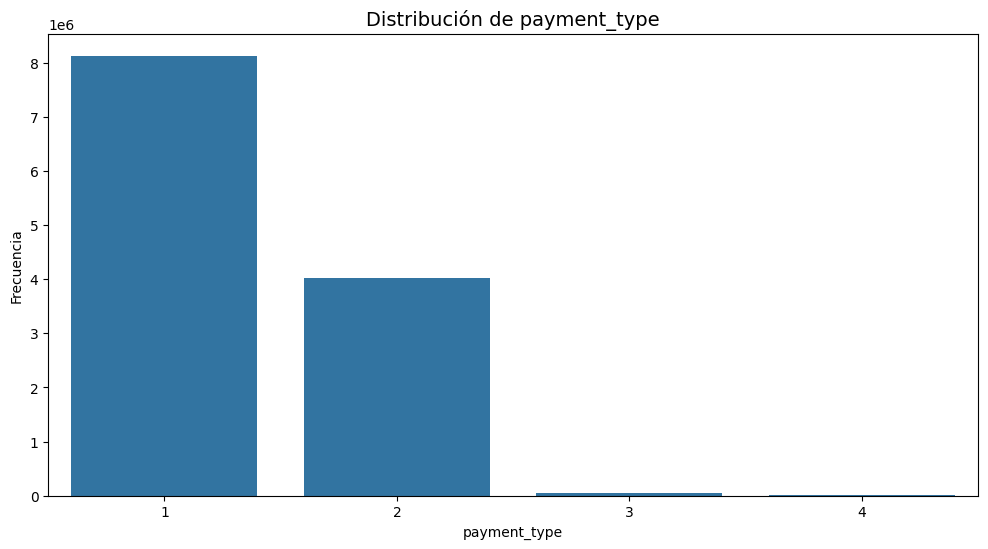

In [ ]:
for var in vars_cat:
    order = data[var].value_counts().index
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=var, order=order)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.2: Análisis Univeriado de Variables Númericas

#### Paso 9.2.1: Análisis Univeriado de Variables Discretas

In [ ]:
for var in vars_disc:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

#### Paso 9.2.2: Análisis Univeriado de Variables Continuas

In [ ]:
for var in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    sns.histplot(data_cleaned[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.3: Análisis Univeriado del Variable Objetivo

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Antes de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Después de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')
plt.show()

## Paso 10: Análisis Bivariado

### Paso 10.1: Análisis Bivariado: Relación con el Precio